In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [162]:
dir_path = '/home/zhangy15/projects/WGS_de_novo_analysis/Revise_denovo_7152024'
os.chdir(dir_path)

In [163]:
case_gt = pd.read_csv('/home/zhangy15/projects/WGS_de_novo_analysis/final_summary/DNM_summary_case_score_rmlowmap_rm100bp_rmMUC', sep="\t")
ctrl_gt = pd.read_csv('/home/zhangy15/projects/WGS_de_novo_analysis/final_summary/DNM_summary_ctrl_score_rmlowmap_rm100bp_rmMUC', sep="\t")

In [164]:
#case noncoding cadd >15
case_noncoding_cadd = case_gt[
    (case_gt['Func'] != 'splicing') & 
    (case_gt['Func'] != 'exonic') & 
    (case_gt['Func'] != 'exonic\\x3bsplicing') &
    (case_gt['cadd_score'] >=15)
]

In [165]:
case_noncoding_cadd

,chr,pos,ID,sample,gene,Func,ExonicFunc,cadd_score
54,chr10,100508212,chr10_100508212_G_C,SP0251843,SEC31B,intronic,.,15.98
68,chr10,100612939,chr10_100612939_A_G,SP0159896,HIF1AN\x3bPAX2,intergenic,.,22.10
69,chr10,100613932,chr10_100613932_A_G,SP0087042,HIF1AN\x3bPAX2,intergenic,.,22.50
79,chr10,100688226,chr10_100688226_G_A,SP0193511,HIF1AN\x3bPAX2,intergenic,.,18.79
92,chr10,100763337,chr10_100763337_ATTGAATTTCTCAG_A,SP0243599,PAX2,intronic,.,17.76
...,...,...,...,...,...,...,...,...
306743,chrX,920607,chrX_920607_G_C,SP0181053,SHOX\x3bCRLF2,intergenic,.,16.49
306900,chrX,97563196,chrX_97563196_G_T,SP0221642,DIAPH2-AS1,ncRNA_intronic,.,15.38
306994,chrY,11336620,chrY_11336620_G_A,SP0236540,TTTY23\x3bGYG2P1,intergenic,.,35.00
307001,chrY,11350938,chrY_11350938_A_T,SP0197857,TTTY23\x3bGYG2P1,intergenic,.,37.00


In [168]:
#rm intergenic
case_gt=case_gt[case_gt['Func'] != 'intergenic']
ctrl_gt=ctrl_gt[ctrl_gt['Func'] != 'intergenic']

In [169]:
#combined case and ctrl calculate the DNMs number
case_gt['class']=1
ctrl_gt['class']=0
#merge case and control
my_df=pd.concat([case_gt, ctrl_gt], ignore_index=True)
my_df

,chr,pos,ID,sample,gene,Func,ExonicFunc,cadd_score,class
0,chr10,100001412,chr10_100001412_T_G,SP0154098,DNMBP,intronic,.,2.322,1
1,chr10,100046733,chr10_100046733_A_AC,SP0157054,CPN1,intronic,.,0.889,1
2,chr10,100075910,chr10_100075910_C_T,SP0202425,CPN1,splicing,.,33.000,1
3,chr10,100154253,chr10_100154253_A_AC,SP0302012,ERLIN1,intronic,.,3.241,1
4,chr10,100166943,chr10_100166943_T_C,SP0321189,ERLIN1,intronic,.,4.813,1
...,...,...,...,...,...,...,...,...,...
251682,chrX,9881111,chrX_9881111_G_A,SP0211669,SHROOM2,intronic,.,1.745,0
251683,chrX,9894522,chrX_9894522_A_G,SP0155141,SHROOM2,exonic,nonsynonymous_SNV,20.100,0
251684,chrX,9908972,chrX_9908972_T_TAAATAAATAAATAAATAAAA,SP0101566,SHROOM2,intronic,.,0.405,0
251685,chrX,9968594,chrX_9968594_C_T,SP0163201,CLDN34,downstream,.,1.038,0


In [170]:
#case all DNM
case_gene_count=pd.DataFrame(case_gt['gene'].value_counts()).reset_index()
case_gene_count.columns=['gene','case_DNM']
#control all DNM
ctrl_gene_count=pd.DataFrame(ctrl_gt['gene'].value_counts()).reset_index()
ctrl_gene_count.columns=['gene','ctrl_DNM']
#merge case and control
d1=pd.merge(case_gene_count,ctrl_gene_count, on='gene', how='left')
d1

,gene,case_DNM,ctrl_DNM
0,CSMD1,488,341.0
1,RBFOX1,393,249.0
2,PTPRD,331,217.0
3,DLG2,265,179.0
4,WWOX,251,155.0
...,...,...,...
19506,ERCC6L\x3bPIN4,1,NaN
19507,PITX3,1,1.0
19508,THAP9-AS1,1,2.0
19509,THAP9,1,NaN


In [171]:
#case coding DNM
case_coding = my_df[
    (my_df['class'] == 1) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing'))
]
case_coding_count=pd.DataFrame(case_coding['gene'].value_counts()).reset_index()
case_coding_count.columns=['gene','coding_DNM_case']

#ctrl coding DNM
control_coding = my_df[
    (my_df['class'] == 0) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing'))
]
control_coding_count=pd.DataFrame(control_coding['gene'].value_counts()).reset_index()
control_coding_count.columns=['gene','coding_DNM_ctrl']
d2=pd.merge(case_coding_count,control_coding_count, on='gene', how='left')
d2

,gene,coding_DNM_case,coding_DNM_ctrl
0,SCN2A,11,NaN
1,TTN,10,7.0
2,OBSCN,7,2.0
3,BRD4,6,NaN
4,ADGRL1,6,NaN
...,...,...,...
3553,DNAAF1,1,NaN
3554,TAF1C,1,1.0
3555,KCNG4,1,NaN
3556,RPE65,1,NaN


In [172]:
#case coding DNM_missense
case_coding = my_df[
    (my_df['class'] == 1) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing')) &
    (my_df['ExonicFunc'] == 'nonsynonymous_SNV')
]
case_coding_count=pd.DataFrame(case_coding['gene'].value_counts()).reset_index()
case_coding_count.columns=['gene','mis_DNM_case']

#ctrl coding DNM
control_coding = my_df[
    (my_df['class'] == 0) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing')) &
    (my_df['ExonicFunc'] == 'nonsynonymous_SNV')
]
control_coding_count=pd.DataFrame(control_coding['gene'].value_counts()).reset_index()
control_coding_count.columns=['gene','mis_DNM_ctrl']
d3=pd.merge(case_coding_count,control_coding_count, on='gene', how='left')
d3

,gene,mis_DNM_case,mis_DNM_ctrl
0,CACNA1I,5,NaN
1,SCN2A,5,NaN
2,FAT2,5,NaN
3,SRRM2,4,3.0
4,ACAN,4,NaN
...,...,...,...
2394,ADGRG5,1,1.0
2395,PIGQ,1,NaN
2396,CDH16,1,NaN
2397,C16orf70,1,NaN


In [173]:
#case coding DNM_missense
case_coding = my_df[
    (my_df['class'] == 1) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['ExonicFunc'] == 'frameshift_deletion') |
    (my_df['ExonicFunc'] == 'frameshift_insertion') |
    (my_df['ExonicFunc'] == 'startloss')|
    (my_df['ExonicFunc'] == 'stopgain') |
    (my_df['ExonicFunc'] == 'stoploss'))
]
case_coding_count=pd.DataFrame(case_coding['gene'].value_counts()).reset_index()
case_coding_count.columns=['gene','lof_DNM_case']

#ctrl coding DNM
control_coding = my_df[
    (my_df['class'] == 0) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['ExonicFunc'] == 'frameshift_deletion') |
    (my_df['ExonicFunc'] == 'frameshift_insertion') |
    (my_df['ExonicFunc'] == 'startloss')|
    (my_df['ExonicFunc'] == 'stopgain') |
    (my_df['ExonicFunc'] == 'stoploss'))
]
control_coding_count=pd.DataFrame(control_coding['gene'].value_counts()).reset_index()
control_coding_count.columns=['gene','lof_DNM_ctrl']
d4=pd.merge(case_coding_count,control_coding_count, on='gene', how='left')
d4

,gene,lof_DNM_case,lof_DNM_ctrl
0,SCN2A,6,NaN
1,BRSK2,4,NaN
2,CCDC168,3,NaN
3,AUTS2,3,NaN
4,SRCAP,3,NaN
...,...,...,...
457,NFAT5,1,NaN
458,JMJD8,1,NaN
459,SETD1A,1,NaN
460,MYLPF,1,NaN


In [174]:
#case coding DNM_missense
case_coding = my_df[
    (my_df['class'] == 1) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing')) &
    (my_df['ExonicFunc'] == 'synonymous_SNV')
]
case_coding_count=pd.DataFrame(case_coding['gene'].value_counts()).reset_index()
case_coding_count.columns=['gene','syn_DNM_case']

#ctrl coding DNM
control_coding = my_df[
    (my_df['class'] == 0) &
    ((my_df['Func'] == 'splicing') | 
    (my_df['Func'] == 'exonic') | 
    (my_df['Func'] == 'exonic\\x3bsplicing')) &
    (my_df['ExonicFunc'] == 'synonymous_SNV')
]
control_coding_count=pd.DataFrame(control_coding['gene'].value_counts()).reset_index()
control_coding_count.columns=['gene','syn_DNM_ctrl']
d5=pd.merge(case_coding_count,control_coding_count, on='gene', how='left')
d5

,gene,syn_DNM_case,syn_DNM_ctrl
0,ADGRL1,4,NaN
1,OBSCN,4,NaN
2,PTPRF,3,NaN
3,HELZ2,3,NaN
4,TTN,3,NaN
...,...,...,...
986,NUP93,1,NaN
987,PLLP,1,NaN
988,GOT2,1,NaN
989,PDP2,1,NaN


In [175]:
#case noncoding
case_noncoding = my_df[
    (my_df['class'] == 1) & 
    (my_df['Func'] != 'splicing') & 
    (my_df['Func'] != 'exonic') & 
    (my_df['Func'] != 'exonic\\x3bsplicing')
]
case_noncoding_count=pd.DataFrame(case_noncoding['gene'].value_counts()).reset_index()
case_noncoding_count.columns=['gene','noncoding_DNM_case']

#ctrl_noncoding
control_noncoding = my_df[
    (my_df['class'] == 0) & 
    (my_df['Func'] != 'splicing') & 
    (my_df['Func'] != 'exonic') & 
    (my_df['Func'] != 'exonic\\x3bsplicing')
]
control_noncoding_count=pd.DataFrame(control_noncoding['gene'].value_counts()).reset_index()
control_noncoding_count.columns=['gene','noncoding_DNM_ctrl']
d6=pd.merge(case_noncoding_count,control_noncoding_count, on='gene', how='left')
d6

,gene,noncoding_DNM_case,noncoding_DNM_ctrl
0,CSMD1,487,340.0
1,RBFOX1,393,249.0
2,PTPRD,331,216.0
3,DLG2,264,179.0
4,WWOX,251,155.0
...,...,...,...
18935,RAB41,1,1.0
18936,SNX12,1,1.0
18937,FOXO4,1,NaN
18938,MED12,1,1.0


In [176]:
#case noncoding cadd >15
case_noncoding_cadd = my_df[
    (my_df['class'] == 1) & 
    (my_df['Func'] != 'splicing') & 
    (my_df['Func'] != 'exonic') & 
    (my_df['Func'] != 'exonic\\x3bsplicing') &
    (my_df['cadd_score'] >=15)
]
case_noncoding_cadd_count=pd.DataFrame(case_noncoding_cadd['gene'].value_counts()).reset_index()
case_noncoding_cadd_count.columns=['gene','noncoding_DNM_cadd_case']

#ctrl noncoding cadd >15
control_noncoding_cadd = my_df[
    (my_df['class'] == 0) & 
    (my_df['Func'] != 'splicing') & 
    (my_df['Func'] != 'exonic') & 
    (my_df['Func'] != 'exonic\\x3bsplicing') &
    (my_df['cadd_score'] >=15)
]
control_noncoding_cadd_count=pd.DataFrame(control_noncoding_cadd['gene'].value_counts()).reset_index()
control_noncoding_cadd_count.columns=['gene','noncoding_DNM_cadd_ctrl']
d7=pd.merge(case_noncoding_cadd_count,control_noncoding_cadd_count, on='gene', how='left')
d7

,gene,noncoding_DNM_cadd_case,noncoding_DNM_cadd_ctrl
0,RBFOX1,13,9.0
1,TENM2,12,4.0
2,LRMDA,12,6.0
3,WWOX,12,11.0
4,PARD3B,10,6.0
...,...,...,...
2180,PTCSC2,1,NaN
2181,GABBR2,1,1.0
2182,LDB1,1,NaN
2183,NR4A3,1,3.0


In [177]:
#merge
m1=pd.merge(d1,d2, on='gene', how='left')
m2=pd.merge(m1,d3, on='gene', how='left')
m3=pd.merge(m2,d4, on='gene', how='left')
m4=pd.merge(m3,d5, on='gene', how='left')
m5=pd.merge(m4,d6, on='gene', how='left')
DNM_gt=pd.merge(m5,d7, on='gene', how='left')
DNM_gt

,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,syn_DNM_ctrl,noncoding_DNM_case,noncoding_DNM_ctrl,noncoding_DNM_cadd_case,noncoding_DNM_cadd_ctrl
0,CSMD1,488,341.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,487.0,340.0,3.0,3.0
1,RBFOX1,393,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0,249.0,13.0,9.0
2,PTPRD,331,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.0,216.0,5.0,2.0
3,DLG2,265,179.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,264.0,179.0,4.0,2.0
4,WWOX,251,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,155.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
19507,PITX3,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0
19508,THAP9-AS1,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN
19509,THAP9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [178]:
#all coding
# calculated fisher exact p value
from numpy import inf
#DNM_gt = DNM_gt.replace(np.inf, 0)
DNM_gt = DNM_gt.replace(np.NAN, 0)

#intergenic cadd >=15
DNM_gt['coding_DNM_case_other']=3508-DNM_gt['coding_DNM_case']
DNM_gt['coding_DNM_ctrl_other']=2188-DNM_gt['coding_DNM_ctrl']
##caculated fisherexact p value
import pandas as pd
from scipy.stats import fisher_exact

# Assuming DNM is your existing DataFrame and it's already loaded

# Add new columns for P-value and odds ratio initialized with NaNs
DNM_gt['pvalue_coding'] = pd.NA
DNM_gt['OR_coding'] = pd.NA

for index, row in DNM_gt.iterrows():
    # Construct the contingency table with the current row's data
    table = [[row['coding_DNM_case'], row['coding_DNM_ctrl']],
             [row['coding_DNM_case_other'], row['coding_DNM_ctrl_other']]]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    # Add the results directly to the same row in DNM
    DNM_gt.at[index, 'pvalue_coding'] = p_value
    DNM_gt.at[index, 'OR_coding'] = odds_ratio

# At this point, DNM has two new columns: 'P-value' and 'odds_ratio'

DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong
DNM_gt

/tmp/ipykernel_1469623/2748708003.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong


,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,syn_DNM_ctrl,noncoding_DNM_case,noncoding_DNM_ctrl,noncoding_DNM_cadd_case,noncoding_DNM_cadd_ctrl,coding_DNM_case_other,coding_DNM_ctrl_other,pvalue_coding,OR_coding
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,487.0,340.0,3.0,3.0,3507.0,2187.0,0.852486,0.62361
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393.0,249.0,13.0,9.0,3508.0,2188.0,1.0,inf
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,216.0,5.0,2.0,3508.0,2188.0,1.0,inf
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,264.0,179.0,4.0,2.0,3507.0,2188.0,0.615871,inf
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,155.0,12.0,11.0,3508.0,2188.0,1.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3508.0,2188.0,1.0,inf
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3508.0,2188.0,1.0,inf
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,3508.0,2188.0,1.0,inf
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3508.0,2188.0,1.0,inf


In [179]:
#missense
# calculated fisher exact p value
from numpy import inf
#DNM_gt = DNM_gt.replace(np.inf, 0)
DNM_gt = DNM_gt.replace(np.NAN, 0)

#intergenic cadd >=20
DNM_gt['mis_DNM_case_other']=3508-DNM_gt['mis_DNM_case']
DNM_gt['mis_DNM_ctrl_other']=2188-DNM_gt['mis_DNM_ctrl']
##caculated fisherexact p value
import pandas as pd
from scipy.stats import fisher_exact

# Assuming DNM is your existing DataFrame and it's already loaded

# Add new columns for P-value and odds ratio initialized with NaNs
DNM_gt['pvalue_mis'] = pd.NA
DNM_gt['OR_mis'] = pd.NA

for index, row in DNM_gt.iterrows():
    # Construct the contingency table with the current row's data
    table = [[row['mis_DNM_case'], row['mis_DNM_ctrl']],
             [row['mis_DNM_case_other'], row['mis_DNM_ctrl_other']]]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    # Add the results directly to the same row in DNM
    DNM_gt.at[index, 'pvalue_mis'] = p_value
    DNM_gt.at[index, 'OR_mis'] = odds_ratio

# At this point, DNM has two new columns: 'P-value' and 'odds_ratio'

DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong
DNM_gt

/tmp/ipykernel_1469623/4279272846.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong


,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,noncoding_DNM_cadd_case,noncoding_DNM_cadd_ctrl,coding_DNM_case_other,coding_DNM_ctrl_other,pvalue_coding,OR_coding,mis_DNM_case_other,mis_DNM_ctrl_other,pvalue_mis,OR_mis
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3507.0,2187.0,0.852486,0.62361,3507.0,2188.0,0.615871,inf
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,9.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,3507.0,2188.0,0.615871,inf,3507.0,2188.0,0.615871,inf
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,11.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf


In [180]:
#lof
# calculated fisher exact p value
from numpy import inf
#DNM_gt = DNM_gt.replace(np.inf, 0)
DNM_gt = DNM_gt.replace(np.NAN, 0)

#intergenic cadd >=20
DNM_gt['lof_DNM_case_other']=3508-DNM_gt['lof_DNM_case']
DNM_gt['lof_DNM_ctrl_other']=2188-DNM_gt['lof_DNM_ctrl']
##caculated fisherexact p value
import pandas as pd
from scipy.stats import fisher_exact

# Assuming DNM is your existing DataFrame and it's already loaded

# Add new columns for P-value and odds ratio initialized with NaNs
DNM_gt['pvalue_lof'] = pd.NA
DNM_gt['OR_lof'] = pd.NA

for index, row in DNM_gt.iterrows():
    # Construct the contingency table with the current row's data
    table = [[row['lof_DNM_case'], row['lof_DNM_ctrl']],
             [row['lof_DNM_case_other'], row['lof_DNM_ctrl_other']]]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    # Add the results directly to the same row in DNM
    DNM_gt.at[index, 'pvalue_lof'] = p_value
    DNM_gt.at[index, 'OR_lof'] = odds_ratio

# At this point, DNM has two new columns: 'P-value' and 'odds_ratio'

DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong
DNM_gt

/tmp/ipykernel_1469623/781241541.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong


,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,pvalue_coding,OR_coding,mis_DNM_case_other,mis_DNM_ctrl_other,pvalue_mis,OR_mis,lof_DNM_case_other,lof_DNM_ctrl_other,pvalue_lof,OR_lof
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.852486,0.62361,3507.0,2188.0,0.615871,inf,3508.0,2188.0,1.0,inf
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.615871,inf,3507.0,2188.0,0.615871,inf,3508.0,2188.0,1.0,inf
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf


In [181]:
#syn
# calculated fisher exact p value
from numpy import inf
#DNM_gt = DNM_gt.replace(np.inf, 0)
DNM_gt = DNM_gt.replace(np.NAN, 0)

#intergenic cadd >=20
DNM_gt['syn_DNM_case_other']=3508-DNM_gt['syn_DNM_case']
DNM_gt['syn_DNM_ctrl_other']=2188-DNM_gt['syn_DNM_ctrl']
##caculated fisherexact p value
import pandas as pd
from scipy.stats import fisher_exact

# Assuming DNM is your existing DataFrame and it's already loaded

# Add new columns for P-value and odds ratio initialized with NaNs
DNM_gt['pvalue_syn'] = pd.NA
DNM_gt['OR_syn'] = pd.NA

for index, row in DNM_gt.iterrows():
    # Construct the contingency table with the current row's data
    table = [[row['syn_DNM_case'], row['syn_DNM_ctrl']],
             [row['syn_DNM_case_other'], row['syn_DNM_ctrl_other']]]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    # Add the results directly to the same row in DNM
    DNM_gt.at[index, 'pvalue_syn'] = p_value
    DNM_gt.at[index, 'OR_syn'] = odds_ratio

# At this point, DNM has two new columns: 'P-value' and 'odds_ratio'

DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong
DNM_gt

/tmp/ipykernel_1469623/2782969409.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong


,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,pvalue_mis,OR_mis,lof_DNM_case_other,lof_DNM_ctrl_other,pvalue_lof,OR_lof,syn_DNM_case_other,syn_DNM_ctrl_other,pvalue_syn,OR_syn
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.615871,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.615871,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf


In [182]:
#noncoding
# calculated fisher exact p value
from numpy import inf
#DNM_gt = DNM_gt.replace(np.inf, 0)
DNM_gt = DNM_gt.replace(np.NAN, 0)

#intergenic cadd >=20
DNM_gt['noncoding_DNM_cadd_case_other']=3508-DNM_gt['noncoding_DNM_cadd_case']
DNM_gt['noncoding_DNM_cadd_ctrl_other']=2188-DNM_gt['noncoding_DNM_cadd_ctrl']
##caculated fisherexact p value
import pandas as pd
from scipy.stats import fisher_exact

# Assuming DNM is your existing DataFrame and it's already loaded

# Add new columns for P-value and odds ratio initialized with NaNs
DNM_gt['pvalue_noncoding'] = pd.NA
DNM_gt['OR_noncoding'] = pd.NA

for index, row in DNM_gt.iterrows():
    # Construct the contingency table with the current row's data
    table = [[row['noncoding_DNM_cadd_case'], row['noncoding_DNM_cadd_ctrl']],
             [row['noncoding_DNM_cadd_case_other'], row['noncoding_DNM_cadd_ctrl_other']]]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    # Add the results directly to the same row in DNM
    DNM_gt.at[index, 'pvalue_noncoding'] = p_value
    DNM_gt.at[index, 'OR_noncoding'] = odds_ratio

# At this point, DNM has two new columns: 'P-value' and 'odds_ratio'

DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong
DNM_gt

/tmp/ipykernel_1469623/2955842348.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DNM_gt.fillna(np.inf, inplace=True) #if not the excel will wrong


,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,pvalue_lof,OR_lof,syn_DNM_case_other,syn_DNM_ctrl_other,pvalue_syn,OR_syn,noncoding_DNM_cadd_case_other,noncoding_DNM_cadd_ctrl_other,pvalue_noncoding,OR_noncoding
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3505.0,2185.0,0.842131,0.623395
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3495.0,2179.0,0.681841,0.900556
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3503.0,2186.0,0.454825,1.560091
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3504.0,2186.0,0.577215,1.247717
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3496.0,2177.0,0.873148,0.679322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3508.0,2188.0,1.0,inf
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3507.0,2187.0,0.852486,0.623610
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3507.0,2188.0,0.615871,inf
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,inf,3508.0,2188.0,1.0,inf,3507.0,2188.0,0.615871,inf


In [184]:
columns_to_drop = [col for col in DNM_gt.columns if col.endswith('_other')]
DNM_gt.drop(columns=columns_to_drop, inplace=True)

In [185]:
#calculate the expected DNMs
gene_pro = pd.read_csv('/home/zhangy15/projects/SSC_DNM_analysis/raw_data/DNM_summary/probobility_gene.csv', sep=',')

In [186]:
Expt_pro=pd.merge(DNM_gt,gene_pro, on='gene', how='left')
Expt_pro

,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,tx_end,bp,n_exons,p_all,p_syn,p_mis,p_non,p_css,p_fs,p_lof
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,4851938.0,10695.0,70.0,0.000149,0.000047,0.000094,5.000000e-06,2.980000e-06,3.050000e-07,8.280000e-06
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7760747.0,1257.0,13.0,0.000028,0.000010,0.000017,9.110000e-07,5.310000e-07,1.380000e-07,1.580000e-06
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8733843.0,5739.0,35.0,0.000083,0.000022,0.000056,3.130000e-06,1.500000e-06,4.110000e-07,5.040000e-06
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,85309740.0,2928.0,26.0,0.000040,0.000011,0.000026,2.010000e-06,1.270000e-06,3.020000e-06,6.310000e-06
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79245693.0,1245.0,9.0,0.000022,0.000007,0.000014,6.660000e-07,3.410000e-07,9.790000e-07,1.990000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19507,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103991837.0,909.0,3.0,0.000019,0.000007,0.000011,2.580000e-07,6.570000e-08,4.330000e-07,7.570000e-07
19508,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19509,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83840077.0,2712.0,5.0,0.000033,0.000009,0.000023,1.770000e-06,2.980000e-07,5.810000e-07,2.650000e-06


In [187]:
count=(Expt_pro['bp']>0).sum()
count

13757

In [188]:
#download cadd score for coding and noncoding
cod_all=pd.read_csv('/home/zhangy15/projects/SSC_DNM_analysis/raw_data/DNM_summary/cadd_score_download/coding.all.gene', sep='\t', header=None)
noncod_all=pd.read_csv('/home/zhangy15/projects/SSC_DNM_analysis/raw_data/DNM_summary/cadd_score_download/noncoding.all.gene', sep='\t',header=None)

cod_cadd15_all=pd.read_csv('/home/zhangy15/projects/WGS_de_novo_analysis/script/cadd_genome/coding_all_gene_cadd15', sep='\t',header=None)
noncod_cadd15_all=pd.read_csv('/home/zhangy15/projects/WGS_de_novo_analysis/script/cadd_genome/noncoding_all_gene_cadd15', sep='\t',header=None)

#add columns 
cod_all.columns=['gene','fun_cod','coding_num']
noncod_all.columns=['gene','fun_ncod','noncoding_num']
cod_cadd15_all.columns=['gene','fun_cod15','coding_cadd15_num']
noncod_cadd15_all.columns=['gene','fun_ncod15','noncoding_cadd15_num']


In [189]:
#merge 
m1=pd.merge(Expt_pro,cod_all, on='gene', how='left')
m2=pd.merge(m1,noncod_all, on='gene', how='left')
m3=pd.merge(m2,cod_cadd15_all, on='gene', how='left')
m4=pd.merge(m3,noncod_cadd15_all, on='gene', how='left')
m4

,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,p_fs,p_lof,fun_cod,coding_num,fun_ncod,noncoding_num,fun_cod15,coding_cadd15_num,fun_ncod15,noncoding_cadd15_num
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.050000e-07,8.280000e-06,CodingTranscript,10597.0,Transcript,2027781.0,CodingTranscript,8251.0,Transcript,12924.0
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.380000e-07,1.580000e-06,CodingTranscript,1622.0,Transcript,2420506.0,CodingTranscript,1224.0,Transcript,102866.0
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.110000e-07,5.040000e-06,CodingTranscript,5735.0,Transcript,2272917.0,CodingTranscript,4839.0,Transcript,83477.0
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.020000e-06,6.310000e-06,CodingTranscript,2925.0,Transcript,2075338.0,CodingTranscript,2469.0,Transcript,47056.0
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.790000e-07,1.990000e-06,CodingTranscript,1242.0,Transcript,1071476.0,CodingTranscript,960.0,Transcript,64835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19512,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19513,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.330000e-07,7.570000e-07,CodingTranscript,906.0,Transcript,10418.0,CodingTranscript,725.0,Transcript,1347.0
19514,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,Transcript,5672.0,NaN,NaN,Transcript,231.0
19515,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.810000e-07,2.650000e-06,CodingTranscript,1723.0,Transcript,12578.0,CodingTranscript,1203.0,Transcript,274.0


In [191]:
#all coding
m4['expected_coding']=m4['p_all']*3508*2
#mis
m4['expected_mis']=m4['p_mis']*3508*2
#lof
m4['expected_lof']=m4['p_lof']*3508*2
#syn
m4['expected_syn']=m4['p_syn']*3508*2

#noncoding
m4['expected_noncoding']=m4['p_all']*3508*2*(m4['noncoding_cadd15_num']/m4['bp'])

In [192]:
m4

,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,noncoding_num,fun_cod15,coding_cadd15_num,fun_ncod15,noncoding_cadd15_num,expected_coding,expected_mis,expected_lof,expected_syn,expected_noncoding
0,CSMD1,488,341.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2027781.0,CodingTranscript,8251.0,Transcript,12924.0,1.047159,0.658802,0.058092,0.332558,1.265403
1,RBFOX1,393,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2420506.0,CodingTranscript,1224.0,Transcript,102866.0,0.195746,0.118570,0.011085,0.066862,16.018814
2,PTPRD,331,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2272917.0,CodingTranscript,4839.0,Transcript,83477.0,0.585134,0.395702,0.035361,0.157158,8.511111
3,DLG2,265,179.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2075338.0,CodingTranscript,2469.0,Transcript,47056.0,0.281342,0.183118,0.044271,0.075071,4.521452
4,WWOX,251,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1071476.0,CodingTranscript,960.0,Transcript,64835.0,0.154352,0.101030,0.013962,0.046306,8.038082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19512,ERCC6L\x3bPIN4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19513,PITX3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10418.0,CodingTranscript,725.0,Transcript,1347.0,0.131901,0.079982,0.005311,0.049954,0.195457
19514,THAP9-AS1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5672.0,NaN,NaN,Transcript,231.0,NaN,NaN,NaN,NaN,NaN
19515,THAP9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12578.0,CodingTranscript,1203.0,Transcript,274.0,0.233633,0.157860,0.018592,0.060688,0.023604


In [193]:
#save
m4.to_csv('/home/zhangy15/projects/WGS_de_novo_analysis/Revise_denovo_7152024/DNM_summary_expected', sep='\t', index=False)

In [102]:
###run possion using R

In [103]:
#combined p value using fisher combined test

In [227]:
DNMs_comb=pd.read_csv('/home/zhangy15/projects/WGS_de_novo_analysis/Revise_denovo_7152024/DNM_summary_fisher_possion', sep=',')

In [228]:
DNMs_comb

,gene,case_DNM,ctrl_DNM,coding_DNM_case,coding_DNM_ctrl,mis_DNM_case,mis_DNM_ctrl,lof_DNM_case,lof_DNM_ctrl,syn_DNM_case,...,expected_coding,expected_mis,expected_lof,expected_syn,expected_noncoding,ppois_coding,ppois_mis,ppois_lof,ppois_syn,ppois_noncoding
0,CSMD1,488,341,1,1,1,0,0,0,0,...,1.047159,0.658802,0.058092,0.332558,1.265403,0.649067,0.482529,1.0,1.0,0.134996
1,RBFOX1,393,249,0,0,0,0,0,0,0,...,0.195746,0.118570,0.011085,0.066862,16.018814,1.000000,1.000000,1.0,1.0,0.808120
2,PTPRD,331,217,0,0,0,0,0,0,0,...,0.585134,0.395702,0.035361,0.157158,8.511111,1.000000,1.000000,1.0,1.0,0.926126
3,DLG2,265,179,1,0,1,0,0,0,0,...,0.281342,0.183118,0.044271,0.075071,4.521452,0.245230,0.167330,1.0,1.0,0.661310
4,WWOX,251,155,0,0,0,0,0,0,0,...,0.154352,0.101030,0.013962,0.046306,8.038082,1.000000,1.000000,1.0,1.0,0.114693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19512,ERCC6L\x3bPIN4,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19513,PITX3,1,1,0,0,0,0,0,0,0,...,0.131901,0.079982,0.005311,0.049954,0.195457,1.000000,1.000000,1.0,1.0,0.177541
19514,THAP9-AS1,1,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19515,THAP9,1,0,0,0,0,0,0,0,0,...,0.233633,0.157860,0.018592,0.060688,0.023604,1.000000,1.000000,1.0,1.0,0.023328


In [229]:
DNMs_comb.fillna(np.inf, inplace=True) #if not the excel will wrong

In [231]:
#combined p value using fisher
import pandas as pd
import numpy as np
from scipy.stats import combine_pvalues

# Define functions to combine p-values for coding, noncoding, and all
def combine_coding_pvalues(row):
    return combine_pvalues([row['ppois_coding'], row['pvalue_coding']])[1]

def combine_mis_pvalues(row):
    # Assuming 'p_noncoding' and 'ppois_noncoding' are the column names for noncoding p-values
    return combine_pvalues([row['ppois_mis'], row['pvalue_mis']])[1]

def combine_lof_pvalues(row):
    # Assuming 'p_noncoding' and 'ppois_noncoding' are the column names for noncoding p-values
    return combine_pvalues([row['ppois_lof'], row['pvalue_lof']])[1]

def combine_syn_pvalues(row):
    # Assuming 'p_noncoding' and 'ppois_noncoding' are the column names for noncoding p-values
    return combine_pvalues([row['ppois_syn'], row['pvalue_syn']])[1]

def combine_noncoding_pvalues(row):
    return combine_pvalues([row['ppois_noncoding'], row['pvalue_noncoding']])[1]

def combine_both_pvalues(row):
    return combine_pvalues([row['ppois_coding'], row['ppois_noncoding'], row['pvalue_coding'], row['pvalue_noncoding']])[1]


# Apply the functions to each row to calculate combined p-values
DNMs_comb['combined_coding_p'] = DNMs_comb.apply(combine_coding_pvalues, axis=1)
DNMs_comb['combined_lof_p'] = DNMs_comb.apply(combine_mis_pvalues, axis=1)
DNMs_comb['combined_mis_p'] = DNMs_comb.apply(combine_lof_pvalues, axis=1)
DNMs_comb['combined_syn_p'] = DNMs_comb.apply(combine_syn_pvalues, axis=1)
DNMs_comb['combined_noncoding_p'] = DNMs_comb.apply(combine_noncoding_pvalues, axis=1)
DNMs_comb['combined_both_p'] = DNMs_comb.apply(combine_both_pvalues, axis=1)

# Display the DataFrame to verify the results
print(DNMs_comb)

# Replace NaN with np.inf if necessary, but consider the implications for your analysis
DNMs_comb.fillna(np.inf, inplace=True) # Note: this step may affect subsequent analysis

# Save the updated DataFrame to a new CSV file
DNMs_comb.to_csv('/home/zhangy15/projects/WGS_de_novo_analysis/Revise_denovo_7152024/SPARK_DNM_summary_fisher_possion_comb.csv', sep='\t', index=False)

                 gene  case_DNM  ctrl_DNM  coding_DNM_case  coding_DNM_ctrl  \
0               CSMD1       488       341                1                1   
1              RBFOX1       393       249                0                0   
2               PTPRD       331       217                0                0   
3                DLG2       265       179                1                0   
4                WWOX       251       155                0                0   
...               ...       ...       ...              ...              ...   
19512  ERCC6L\x3bPIN4         1         0                0                0   
19513           PITX3         1         1                0                0   
19514       THAP9-AS1         1         2                0                0   
19515           THAP9         1         0                0                0   
19516            COQ2         1         0                0                0   

       mis_DNM_case  mis_DNM_ctrl  lof_DNM_case  lo

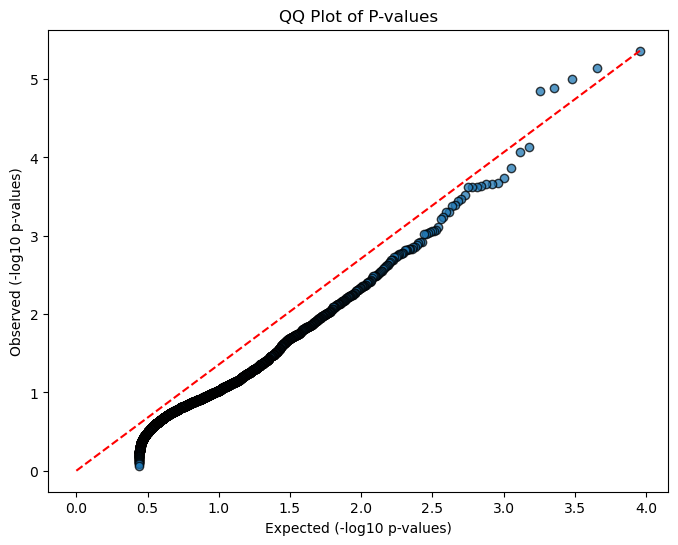

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the p-values from the DataFrame, dropping NaNs and filtering out p-values equal to 1
p_values = DNMs_comb['ppois_coding'].dropna().astype(float)
p_values = p_values[p_values != 1]
p_values = p_values[p_values >2.5e-6]
# Sort the p-values
sorted_p_values = np.sort(p_values)

# Calculate the theoretical quantiles (expected p-values)
theoretical_quantiles = np.linspace(1/(len(sorted_p_values)+1), 1, len(sorted_p_values))

# Generate the QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(-np.log10(theoretical_quantiles), -np.log10(sorted_p_values), edgecolor='k', alpha=0.75)
plt.plot([0, max(-np.log10(theoretical_quantiles))], [0, max(-np.log10(sorted_p_values))], color='r', linestyle='--')

# Add labels and title
plt.xlabel('Expected (-log10 p-values)')
plt.ylabel('Observed (-log10 p-values)')
plt.title('QQ Plot of P-values')

plt.savefig('/home/zhangy15/projects/WGS_de_novo_analysis/Revise_denovo_7152024/spark_qqplot.png',dpi=600)
# Show the plot
plt.show()
